In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('IMDB-Movie-Data - IMDB-Movie-Data.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [2]:
print(df['Title'].value_counts())
title_count=[]
for i in df['Title']:
    count=0
    for j in i.split():
        count=count+1
    title_count.append(count)
print('Average Length of titles are:',sum(title_count)/len(title_count))
duplicates_test=df.duplicated(subset='Title')
for i in range(len(duplicates_test)):
    if duplicates_test[i]==True:
        print("Consists of duplicate titles")
        break

The Host                          2
The Thinning                      1
Monsters University               1
Chuck                             1
The Girl with All the Gifts       1
                                 ..
Underworld: Rise of the Lycans    1
Trance                            1
Source Code                       1
In the Heart of the Sea           1
The Martian                       1
Name: Title, Length: 999, dtype: int64
Average Length of titles are: 2.605
Consists of duplicate titles


{'Action': 303, 'Adventure': 259, 'Sci-Fi': 120, 'Mystery': 106, 'Horror': 119, 'Thriller': 195, 'Animation': 49, 'Comedy': 279, 'Family': 51, 'Fantasy': 101, 'Drama': 513, 'Music': 16, 'Biography': 81, 'Romance': 141, 'History': 29, 'Crime': 150, 'Western': 7, 'War': 13, 'Musical': 5, 'Sport': 18}


<BarContainer object of 1000 artists>

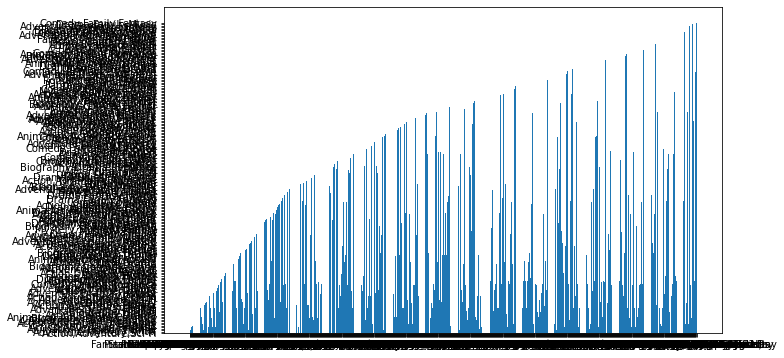

In [3]:
Genre_set=[]
for i in df['Genre']:
    for j in i.split(','):
        Genre_set.append(j)
frequency = {}
for item in Genre_set:
   if item in frequency:
      frequency[item] += 1
   else:
      frequency[item] = 1
print(frequency)
df['Genre'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(df['Title'],df['Genre'])

In [4]:
Desc_count=[]
for i in df['Description']:
    count=0
    for j in i.split():
        count=count+1
    Desc_count.append(count)
print('Average Length of Descriptions are:',sum(Desc_count)/len(Desc_count))
Desc_set=[]
for i in df['Description']:
    for j in i.split():
        Desc_set.append(j)
frequency = {}
for item in Desc_set:
   if item in frequency:
      frequency[item] += 1
   else:
      frequency[item] = 1
print(frequency)
a=df['Description'].isnull()
if True in a:
    print("Has null values")
print("Particular keyword cannot identify")

Average Length of Descriptions are: 27.921
{'A': 342, 'group': 47, 'of': 806, 'intergalactic': 4, 'criminals': 4, 'are': 91, 'forced': 26, 'to': 933, 'work': 14, 'together': 28, 'stop': 23, 'a': 1284, 'fanatical': 1, 'warrior': 8, 'from': 153, 'taking': 8, 'control': 8, 'the': 1240, 'universe.': 1, 'Following': 5, 'clues': 6, 'origin': 1, 'mankind,': 1, 'team': 32, 'finds': 52, 'structure': 1, 'on': 218, 'distant': 4, 'moon,': 2, 'but': 53, 'they': 91, 'soon': 19, 'realize': 10, 'not': 22, 'alone.': 1, 'Three': 12, 'girls': 7, 'kidnapped': 9, 'by': 182, 'man': 66, 'with': 263, 'diagnosed': 4, '23': 1, 'distinct': 1, 'personalities.': 1, 'They': 5, 'must': 69, 'try': 7, 'escape': 10, 'before': 21, 'apparent': 2, 'emergence': 2, 'frightful': 1, 'new': 72, '24th.': 1, 'In': 78, 'city': 10, 'humanoid': 4, 'animals,': 2, 'hustling': 1, 'theater': 3, "impresario's": 1, 'attempt': 11, 'save': 30, 'his': 479, 'singing': 3, 'competition': 5, 'becomes': 33, 'grander': 1, 'than': 14, 'he': 171, '

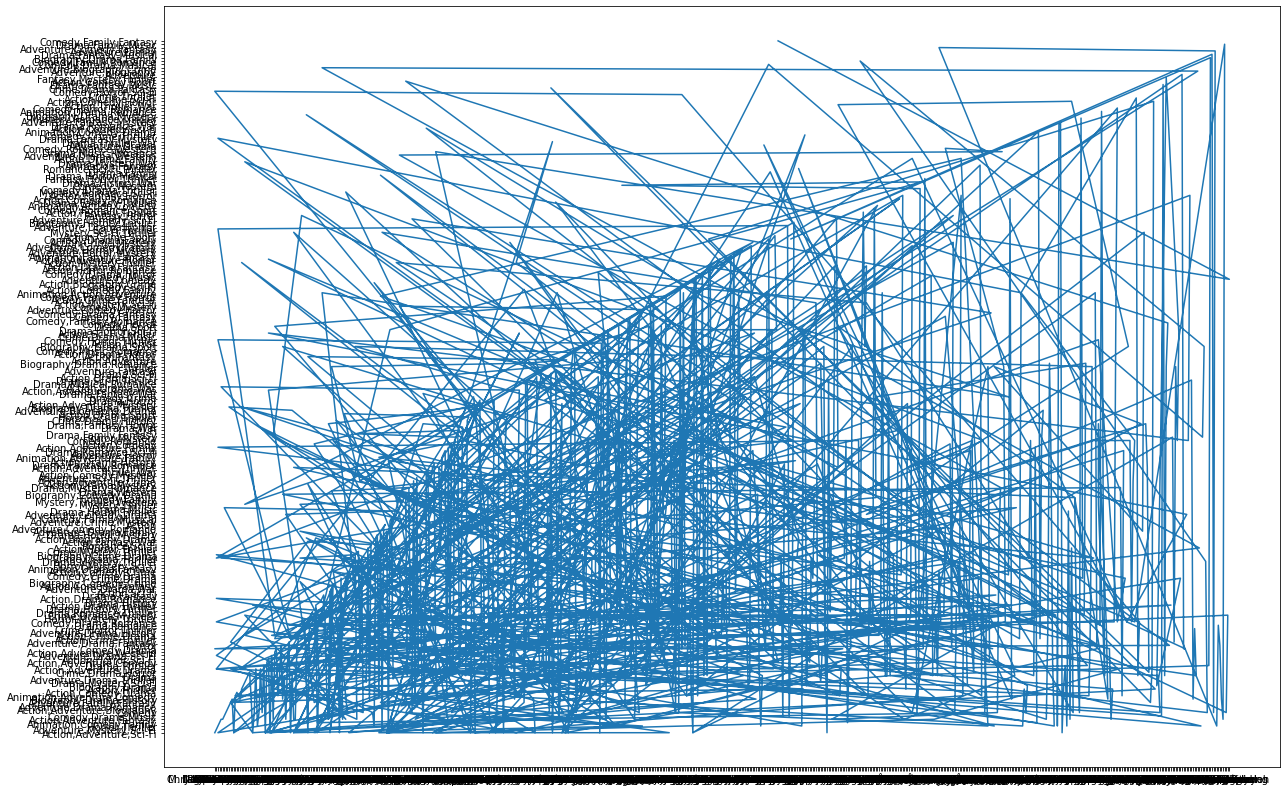

In [5]:
df['Director'].value_counts()
plt.figure(figsize=(20,14))
plt.plot(df['Director'],df['Genre'])

In [14]:
from collections import Counter
director_counts = Counter()
for director in df['Director']:
    director_counts['Director'] += 1
print("Most frequent directors:")
for director, count in director_counts.most_common(10):
    print(f"{director}: {count} movies")
genre_director_counts = df.groupby(['Genre', 'Director']).size()
print("\nGenre-Director Associations:")
print(genre_director_counts)
rating_director_counts = df.groupby(['Rating', 'Director']).size()
print("\nRating-Director Associations:")
print(rating_director_counts)
df['Year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year
director_year_counts = df.groupby(['Director', 'Year']).size()
print("\nDirectors with multiple movies in the same year:")
print(director_year_counts[director_year_counts > 3])

Most frequent directors:
Director: 1000 movies

Genre-Director Associations:
Genre             Director            
Action            John Stockwell          1
                  Todor Chapkanov         1
Action,Adventure  Brett Ratner            1
                  Marc Webb               1
                  Sam Raimi               1
                                         ..
Thriller          Michael J. Gallagher    1
                  Nathan Morlando         1
                  Oz Perkins              1
                  Quentin Tarantino       1
Thriller,War      Fabio Guaglione         1
Length: 950, dtype: int64

Rating-Director Associations:
Rating  Director         
1.9     Jason Friedberg      1
2.7     James Wong           1
        Shawn Burkett        1
3.2     Jonathan Holbrook    1
3.5     Femi Oyeniran        1
                            ..
8.6     Makoto Shinkai       1
        Olivier Nakache      1
8.8     Christopher Nolan    1
        Nitesh Tiwari        1
9.0    

In [16]:
actor_counts = Counter()
for actors in df['Actors']:
    actor_list = actors.split(', ')
    actor_counts.update(actor_list)
print("Most frequent actors:")
for actor, count in actor_counts.most_common(10):
    print(f"{actor}: {count} movies")
actor_pairs = df.groupby(['Actors', 'Title']).size()
print("\nCommon actor pairs or groups:")
print(actor_pairs)
genre_actor_counts = df.groupby(['Genre', 'Actors']).size()
print("\nGenre-Actor Associations:")
print(genre_actor_counts)

rating_actor_counts = df.groupby(['Rating', 'Actors']).size()
print("\nRating-Actor Associations:")
print(rating_actor_counts)

Most frequent actors:
Mark Wahlberg: 15 movies
Christian Bale: 13 movies
Hugh Jackman: 13 movies
Brad Pitt: 13 movies
Michael Fassbender: 12 movies
Tom Hardy: 12 movies
Jake Gyllenhaal: 11 movies
Johnny Depp: 11 movies
Robert Downey Jr.: 11 movies
Channing Tatum: 11 movies

Common actor pairs or groups:
Actors                                                                     Title               
Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman Irani                        PK                      1
Aamir Khan, Madhavan, Mona Singh, Sharman Joshi                            3 Idiots                1
Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,Sanya Malhotra               Dangal                  1
Aaron Paul, Dominic Cooper, Imogen Poots, Scott Mescudi                    Need for Speed          1
Aaron Poole, Kenneth Welsh,Daniel Fathers, Kathleen Munroe                 The Void                1
                                                                                              